In [17]:
print('Confusion Matrix Analysis of Facial Emotion Recognition Models'.upper())

print("""
This notebook plots the confusion matrices for a facial emotion recognition model for later evaluation. 
The model has been validated using the combined validation sets of AffectNet, Raf_DB, and CK+. 

Specifically, the notebook includes:

- A detailed plot of the confusion matrix for the combined validation set.
- 2 confusion matrix plots for only the Raf_DB validation set (unnormalized and normalized).
- 2 confusion matrix plots for both the combined validation set (unnormalized and normalized).


+ BACH PHAM




           --------------------------------------------------------------------------------
""")

CONFUSION MATRIX ANALYSIS OF FACIAL EMOTION RECOGNITION MODELS

This notebook plots the confusion matrices for a facial emotion recognition model for later evaluation. 
The model has been validated using the combined validation sets of AffectNet, Raf_DB, and CK+. 

Specifically, the notebook includes:

- A detailed plot of the confusion matrix for the combined validation set.
- 2 confusion matrix plots for only the Raf_DB validation set (unnormalized and normalized).
- 2 confusion matrix plots for both the combined validation set (unnormalized and normalized).


+ BACH PHAM








I0000 00:00:1729823180.284560  340088 service.cc:146] XLA service 0x7fc7a80199e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729823180.284589  340088 service.cc:154]   StreamExecutor device (0): NVIDIA RTX A5000, Compute Capability 8.6


 73/206 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

I0000 00:00:1729823182.733425  340088 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


206/206 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step
Accuracy per category:
neutral: 75.932%
happy: 91.810%
sad: 66.462%
surprise: 61.037%
fear: 41.638%
disgust: 32.424%
angry: 59.970%
Overall Accuracy: 67.738%


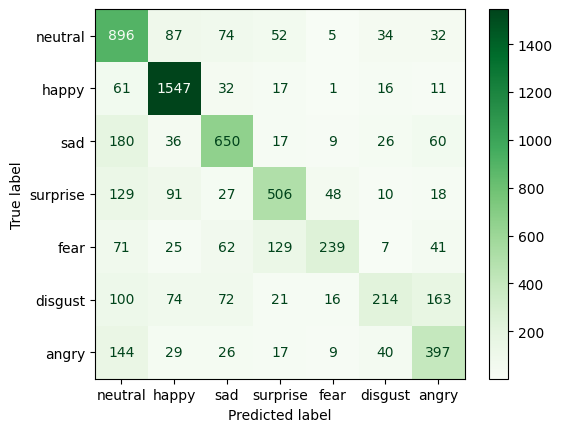

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model = tf.keras.models.load_model('thisworks.h5')

image_size = (160, 160)
val_dir = '160x160/val_set'

def load_images_from_directory(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            for file in os.listdir(label_dir):
                img_path = os.path.join(label_dir, file)
                img = tf.keras.preprocessing.image.load_img(img_path, color_mode='grayscale', target_size=image_size)
                img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
                images.append(img_array)
                labels.append(int(label))
    return np.array(images), np.array(labels)

val_images, val_labels = load_images_from_directory(val_dir)

predicted_labels = model.predict(val_images)
predicted_labels = np.argmax(predicted_labels, axis=1)

label_names = ['neutral', 'happy', 'sad', 'surprise', 'fear', 'disgust', 'angry']

cm = confusion_matrix(val_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)

disp.plot(cmap='Greens')

category_accuracies = cm.diagonal() / cm.sum(axis=1)
accuracy_report = {label_names[i]: category_accuracies[i] for i in range(len(label_names))}
overall_accuracy = np.sum(cm.diagonal()) / np.sum(cm)

print("Accuracy per category:")
for label, accuracy in accuracy_report.items():
    print(f"{label}: {accuracy * 100:.3f}%")

print(f"Overall Accuracy: {overall_accuracy * 100:.3f}%")

with open('accuracy_report.txt', 'w') as f:
    f.write("Accuracy per category:\n")
    for label, accuracy in accuracy_report.items():
        f.write(f"{label}: {accuracy * 100:.3f}%\n")
    f.write(f"Overall Accuracy: {overall_accuracy * 100:.3f}%\n")


plt.savefig('confusion_matrix.png')
plt.show()

96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step
Accuracy per category:
neutral: 77.794%
happy: 90.970%
sad: 82.427%
surprise: 84.802%
fear: 48.649%
disgust: 51.250%
angry: 74.074%
Overall Accuracy: 82.073%


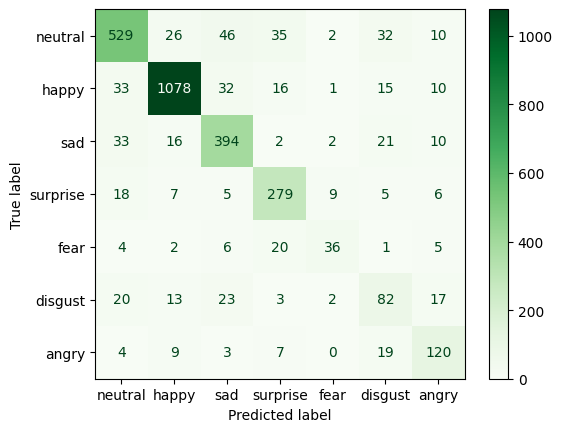

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model = tf.keras.models.load_model('thisworks.h5')

image_size = (160, 160)
val_dir = 'DATASET/val_set'

def load_images_from_directory(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            for file in os.listdir(label_dir):
                img_path = os.path.join(label_dir, file)
                img = tf.keras.preprocessing.image.load_img(img_path, color_mode='grayscale')
                img = img.resize(image_size)  # Resize the image here
                img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
                images.append(img_array)
                labels.append(int(label))
    return np.array(images), np.array(labels)

val_images, val_labels = load_images_from_directory(val_dir)

predicted_labels = model.predict(val_images)
predicted_labels = np.argmax(predicted_labels, axis=1)

label_names = ['neutral', 'happy', 'sad', 'surprise', 'fear', 'disgust', 'angry']

cm = confusion_matrix(val_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)

disp.plot(cmap='Greens')

category_accuracies = cm.diagonal() / cm.sum(axis=1)
accuracy_report = {label_names[i]: category_accuracies[i] for i in range(len(label_names))}
overall_accuracy = np.sum(cm.diagonal()) / np.sum(cm)

print("Accuracy per category:")
for label, accuracy in accuracy_report.items():
    print(f"{label}: {accuracy * 100:.3f}%")

print(f"Overall Accuracy: {overall_accuracy * 100:.3f}%")

with open('RAF_DB_accuracy_report.txt', 'w') as f:
    f.write("Accuracy per category:\n")
    for label, accuracy in accuracy_report.items():
        f.write(f"{label}: {accuracy * 100:.3f}%\n")
    f.write(f"Overall Accuracy: {overall_accuracy * 100:.3f}%\n")


plt.savefig('RAF_DB_confusion_matrix.png')
plt.show()

In [ ]:
###############################################################################

206/206 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Accuracy per category:
neutral: 75.932%
happy: 91.810%
sad: 66.462%
surprise: 61.037%
fear: 41.638%
disgust: 32.424%
angry: 59.970%
Overall Accuracy: 61.325%


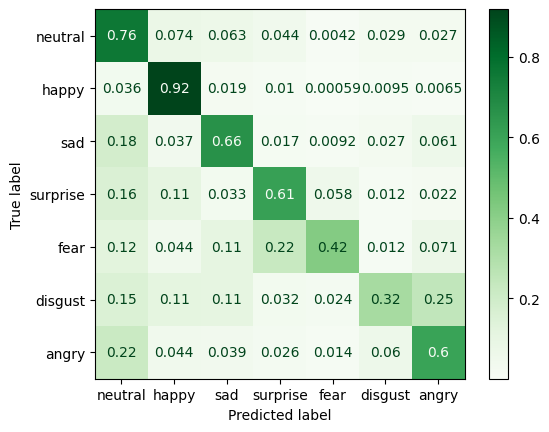

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model = tf.keras.models.load_model('thisworks.h5')
image_size = (160, 160)
val_dir = '160x160/val_set'

def load_images_from_directory(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            for file in os.listdir(label_dir):
                img_path = os.path.join(label_dir, file)
                img = tf.keras.preprocessing.image.load_img(img_path, color_mode='grayscale', target_size=image_size)
                img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
                images.append(img_array)
                labels.append(int(label))
    return np.array(images), np.array(labels)

val_images, val_labels = load_images_from_directory(val_dir)
predicted_labels = model.predict(val_images)
predicted_labels = np.argmax(predicted_labels, axis=1)

label_names = ['neutral', 'happy', 'sad', 'surprise', 'fear', 'disgust', 'angry']
cm = confusion_matrix(val_labels, predicted_labels, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot(cmap='Greens')

category_accuracies = cm.diagonal()
accuracy_report = {label_names[i]: category_accuracies[i] for i in range(len(label_names))}
overall_accuracy = np.mean(category_accuracies)

print("Accuracy per category:")
for label, accuracy in accuracy_report.items():
    print(f"{label}: {accuracy * 100:.3f}%")
print(f"Overall Accuracy: {overall_accuracy * 100:.3f}%")

with open('Norm_accuracy_report.txt', 'w') as f:
    f.write("Accuracy per category:\n")
    for label, accuracy in accuracy_report.items():
        f.write(f"{label}: {accuracy * 100:.3f}%\n")
    f.write(f"Overall Accuracy: {overall_accuracy * 100:.3f}%\n")
plt.savefig('Norm_confusion_matrix.png')
plt.show()

96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step
Accuracy per category:
neutral: 77.794%
happy: 90.970%
sad: 82.427%
surprise: 84.802%
fear: 48.649%
disgust: 51.250%
angry: 74.074%
Overall Accuracy: 72.852%


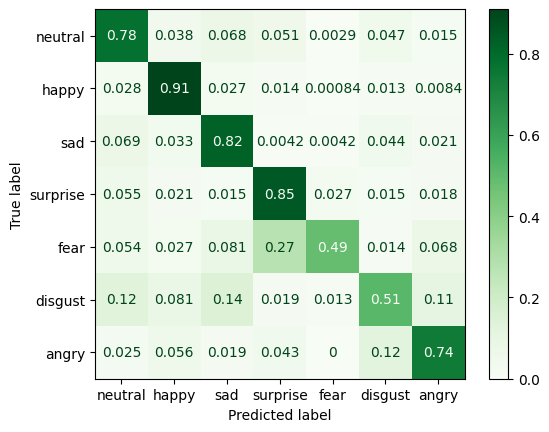

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model = tf.keras.models.load_model('thisworks.h5')
image_size = (160, 160)
val_dir = 'DATASET/val_set'

def load_images_from_directory(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            for file in os.listdir(label_dir):
                img_path = os.path.join(label_dir, file)
                img = tf.keras.preprocessing.image.load_img(img_path, color_mode='grayscale', target_size=image_size)
                img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
                images.append(img_array)
                labels.append(int(label))
    return np.array(images), np.array(labels)

val_images, val_labels = load_images_from_directory(val_dir)
predicted_labels = model.predict(val_images)
predicted_labels = np.argmax(predicted_labels, axis=1)

label_names = ['neutral', 'happy', 'sad', 'surprise', 'fear', 'disgust', 'angry']
cm = confusion_matrix(val_labels, predicted_labels, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot(cmap='Greens')

category_accuracies = cm.diagonal()
accuracy_report = {label_names[i]: category_accuracies[i] for i in range(len(label_names))}
overall_accuracy = np.mean(category_accuracies)

print("Accuracy per category:")
for label, accuracy in accuracy_report.items():
    print(f"{label}: {accuracy * 100:.3f}%")
print(f"Overall Accuracy: {overall_accuracy * 100:.3f}%")

with open('Norm_RAF_DB_accuracy_report.txt', 'w') as f:
    f.write("Accuracy per category:\n")
    for label, accuracy in accuracy_report.items():
        f.write(f"{label}: {accuracy * 100:.3f}%\n")
    f.write(f"Overall Accuracy: {overall_accuracy * 100:.3f}%\n")
plt.savefig('Norm_RAF_DB_confusion_matrix.png')
plt.show()